In [1]:
import numpy as np
from matplotlib import animation
import matplotlib.pyplot as plt
from IPython.display import HTML
import seaborn as sns
import pandas as pd
from regularization import *
from itertools import combinations_with_replacement
from sklearn.preprocessing import MinMaxScaler
sns.set()
df = pd.read_csv('TempLinkoping2016.csv')
df.head()

,time,temp
0,0.002732,0.1
1,0.005464,-4.5
2,0.008197,-6.3
3,0.010929,-9.6
4,0.013661,-9.9


In [2]:
X = df.iloc[:, 0:1].values
Y = MinMaxScaler().fit_transform(df.iloc[:, 1].values.reshape((-1,1)))[:,0]

In [3]:
def sigmoid(X, grad=False):
    if grad:
        return sigmoid(X) * (1 - sigmoid(X))
    else:
        return 1 / (1 + np.exp(-X))

In [4]:
def train_gradient_mean_square(epoch, X, Y, learning_rate, degree, alpha = 0.0005, b = 0):
    n_features = X.shape[1]
    combs = [combinations_with_replacement(range(n_features), i) for i in range(0, degree + 1)]
    flat_combs = [item for sublist in combs for item in sublist]
    X_new = np.empty((X.shape[0], len(flat_combs)))
    for i, index_combs in enumerate(flat_combs):
        X_new[:, i] = np.prod(X[:, index_combs], axis=1)
    n_output_features = len(flat_combs)
    m = np.zeros(X_new.shape[1])
    for i in range(epoch):
        dot = X_new.dot(m) + b
        y_hat = sigmoid(dot)
        de = 2 * (y_hat-Y)
        dy_hat = de * sigmoid(dot,True)
        dm = dy_hat.dot(X)
        db = dy_hat
        m -= learning_rate * dm
        b -= learning_rate * db
    return X_new, m, b

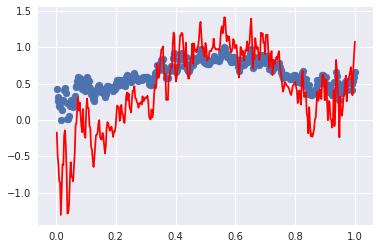

In [5]:
X_new, m, b= train_gradient_mean_square(1000, X, Y, 0.01, 10)
plt.scatter(X[:,0],Y)
plt.plot(X,X_new.dot(m) + b, c='red')
plt.show()